# <center>Segmentation des clients du Mall</center>

### Objectif
- Classer / segmenter les clients du Mall selon leurs caractéristiques numériques et catégorielles.  
- Problème d’**apprentissage non supervisé**.

### <center>Attributs du dataset</center>
- **CustomerID** : Identifiant unique du client  
- **Gender** : Genre du client  
- **Age** : Âge du client  
- **Annual Income (k$)** : Revenu annuel du client (en milliers de dollars)  
- **Spending Score (1–100)** : Score attribué par le Mall en fonction du comportement et des habitudes de dépenses


# Customer Segmentation and Analysis
### Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Ploting the Cluster Boundry and Clusters.
7. 3D Plot of Clusters.

## Importing Libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Info

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64



##### Checking for null values

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


##### Visualisation des valeurs manquantes

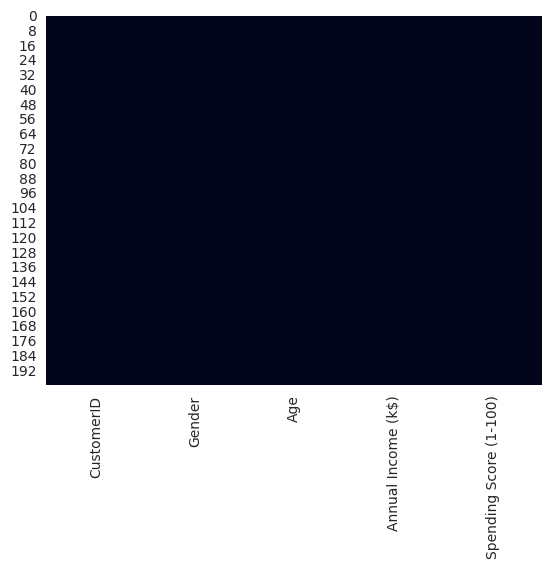

In [ ]:
sns.heatmap(df.isnull(),cbar = False);

- **No null values** present in the data!

##### Vérification et traitement des doublons

In [ ]:
# Vérification des doublons
df.duplicated().sum()




np.int64(0)

- **No duplicate** records detected in the dataset.

#### Résumé statistique


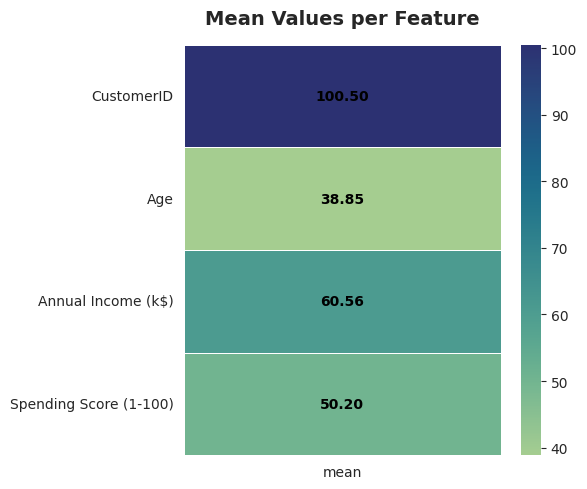

In [ ]:
# @title


# Style global plus élégant
sns.set_style("whitegrid")
plt.figure(figsize=(6, 5))

# Heatmap des valeurs moyennes
sns.heatmap(
    df.describe().T[['mean']],
    cmap='crest',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title('Mean Values per Feature', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()


- L’**âge moyen** des clients du jeu de données se situe à la fin de la trentaine, soit **38,85 ans**.  
- Le **revenu annuel moyen (en milliers de dollars)** des clients est de **60,56 k\$**, soit légèrement inférieur au revenu médian des citoyens américains en 2018 (environ **63 k$**).  
- Le **score de dépense (1–100)** moyen des clients du centre commercial est **centré autour de 50,20**, ce qui indique un **niveau de dépense modéré**.


# **Data Exploration**

### Dividing features into Numerical and Categorical :

In [3]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender
Numerical Features : CustomerID Age Annual Income (k$) Spending Score (1-100)


- Ici, je considère qu’une **variable est catégorielle** si elle a moins de 6 valeurs uniques, sinon je la traite comme une **variable numérique**.  
- On pourrait aussi se baser sur le **type de données** : par exemple, un entier → numérique, une chaîne de caractères → catégorielle.  

**Exemple :** int → numérique ; str → catégorielle

- Comme il n’y a pas beaucoup de variables dans ce dataset, je peux aussi **vérifier ça manuellement** pour être sûre.


### Distribution des Données

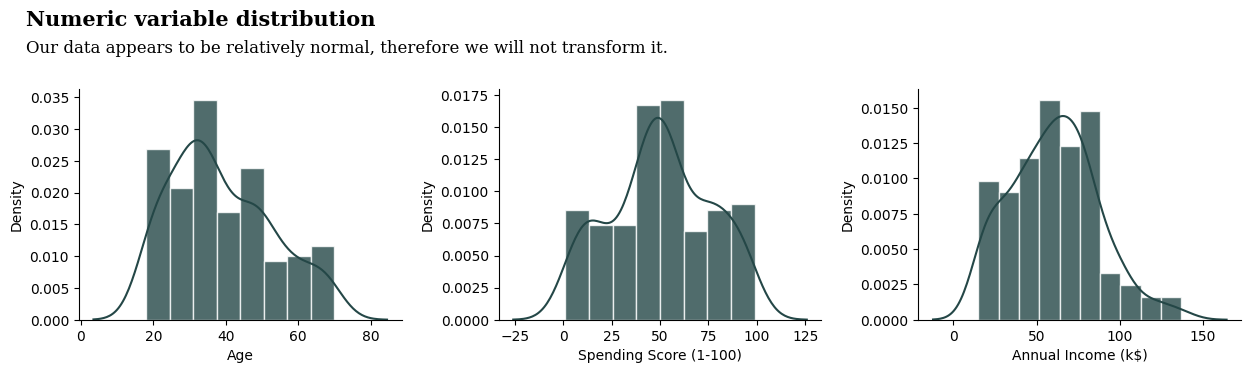

In [4]:
# @title
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3))


fig.text(0.09, 1.09, 'Numeric variable distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1, 'Our data appears to be relatively normal, therefore we will not transform it.', fontsize=12, fontweight='light', fontfamily='serif')


ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.distplot(df["Age"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.distplot(df["Spending Score (1-100)"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.distplot(df["Annual Income (k$)"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots




- Les données ne sont pas trop extrêmes, donc je ne les transformerai pas.
- Nos données semblent relativement **normales**, nous n’allons donc **pas** les **transformer**.

### **Explorons visuellement les données**

#### Répartition par **Gender**

In [5]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Exemple d'ajout du binning d'âge
bins = [18, 22, 50, 70]
labels = ['Young', 'Adult', 'Senior']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



def plot_ratio(df):
    # Ratio of Males & Females
    x = df.groupby(['Gender'])['Gender'].count()
    y = len(df)
    r = ((x / y)).round(2)

    mf_ratio = pd.DataFrame(r).T

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=100,
                                   gridspec_kw={'width_ratios': [2, 1]})

    # --- Bar Plot (ax1) ---
    ax1.barh(mf_ratio.index, mf_ratio['Male'],
            color='#244747', alpha=0.7, label='Male')
    ax1.barh(mf_ratio.index, mf_ratio['Female'], left=mf_ratio['Male'],
            color='#91b8bd', alpha=0.7, label='Female')

    ax1.set_xlim(0, 1)
    ax1.set_xticks([])
    ax1.set_yticks([])

    # male percentage
    for i in mf_ratio.index:
        ax1.annotate(f"{int(mf_ratio['Male'][i]*100)}%",
                       xy=(mf_ratio['Male'][i]/2, i),
                       va='center', ha='center', fontsize=50, fontweight='light',
                       fontfamily='serif', color='white')

        ax1.annotate("Male",
                       xy=(mf_ratio['Male'][i]/2, -0.25),
                       va='center', ha='center', fontsize=12, fontweight='light',
                       fontfamily='serif', color='white')

    for i in mf_ratio.index:
        ax1.annotate(f"{int(mf_ratio['Female'][i]*100)}%",
                       xy=(mf_ratio['Male'][i]+mf_ratio['Female'][i]/2, i),
                       va='center', ha='center', fontsize=50, fontweight='light',
                       fontfamily='serif', color='#244747')
        ax1.annotate("Female",
                       xy=(mf_ratio['Male'][i]+mf_ratio['Female'][i]/2, -0.25),
                       va='center', ha='center', fontsize=12, fontweight='light',
                       fontfamily='serif', color='#244747')

    for s in ['top', 'left', 'right', 'bottom']:
        ax1.spines[s].set_visible(False)

    ax1.legend().set_visible(False)

    # --- Pie Chart (ax2) ---
    ax2.pie(
        x,
        labels=['Male', 'Female'],
        colors=['#244747', '#91b8bd'],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10, 'fontfamily': 'serif'}
    )
    ax2.set_title('Gender Distribution', fontfamily='serif', fontsize=13, fontweight='bold')

    # --- Titles ---
    fig.text(0.1, 1.05, 'Male & Female distribution', fontfamily='serif',
             fontsize=15, fontweight='bold')
    fig.text(0.1, 0.96, 'We see a fairly even split, but with slightly more females.',
             fontfamily='serif', fontsize=12)

    plt.tight_layout()
    plt.show()


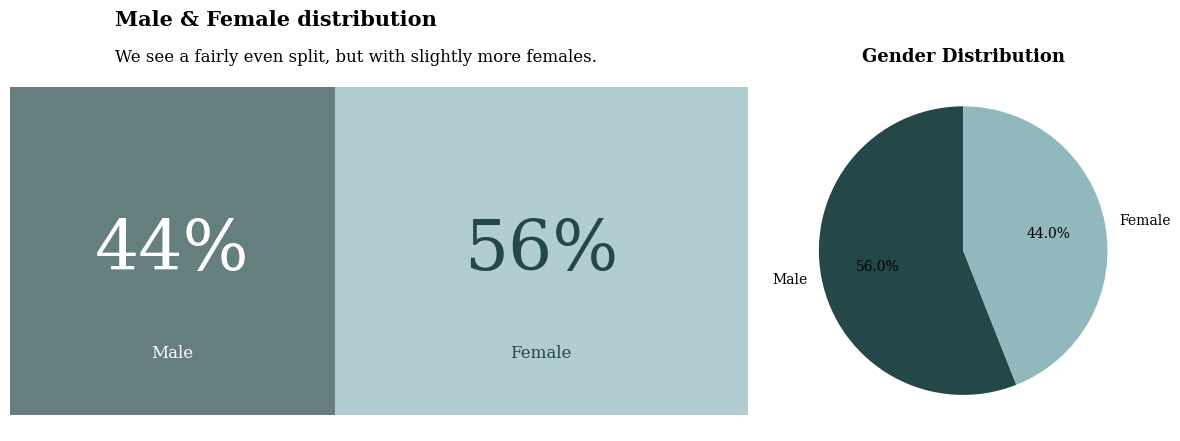

In [ ]:
plot_ratio(df)


- Nous avons donc une répartition assez **équilibrée** des genres.

## Discretization


*   âge → “Jeune”, “Adulte”, “Senior




#### la distribution du **Spending Score** selon le **Gender** et les **tranches d’âge**

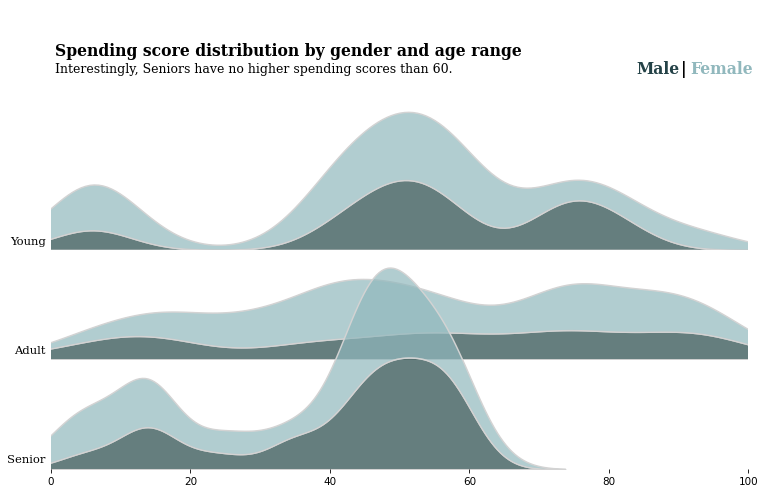

In [ ]:
# @title
# on represent ici selaon tranches d'âge definies:
"""
bins = [18, 22, 50, 70]
labels = ['Young', 'Adult', 'Senior']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
"""

fig = plt.figure(figsize=(12, 8), dpi=75)
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#004c70", "#990000",'#990000']

for idx, cls, c in zip(range(4), df['Age Range'].unique(), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Spending Score (1-100)', data=df[df['Age Range']==cls],
                fill=True, ax=axes[idx], cut=3, bw_method=0.25,
                lw=1.4, edgecolor='lightgray',multiple="stack", palette=['#91b8bd','#244747'], alpha=0.7,hue='Gender')

    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 100)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0.001,f'{cls} ',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 4 : axes[idx].get_legend().remove()


fig.text(0.13,0.8,"Spending score distribution by gender and age range", fontweight="bold", fontfamily='serif', fontsize=15)
fig.text(0.13,0.77,'Interestingly, Seniors have no higher spending scores than 60.',fontfamily='serif',fontsize=12)

fig.text(0.776,0.77,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.825,0.77,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.835,0.77,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

plt.show()

- Fait intéressant, les Seniors n’ont pas de scores de dépense supérieurs à 60 !!!!



> Nous remarquons donc plusieurs zones importantes dans notre jeu de données.




> Nous pouvons examiner **l’âge** un peu plus en détail…




## Discretization

*  Discrétisation de l’âge : transformation de Age en tranches (0–10, 10–20, …), facilitant l’analyse et la visualisation pour chaque  Gender.




In [ ]:
# @title
df['Gender 1/0'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

df['age_band'] = df['Age'].apply(age_band)


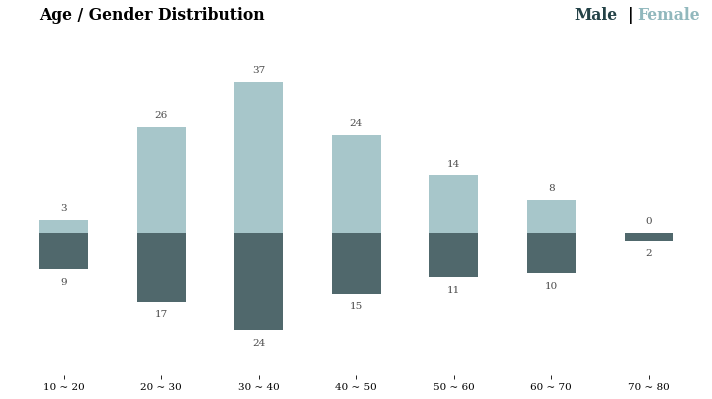

In [ ]:
# @title
mf = df.groupby('Gender')['age_band'].value_counts().unstack().sort_index().fillna(0).astype(int)


female = mf.loc['Female']
male = -mf.loc['Male']

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=75)
ax.bar(male.index, male, width=0.5, color='#244247', alpha=0.8, label='Male')
ax.bar(female.index, female, width=0.5, color='#91b8bd', alpha=0.8, label='Female')
ax.set_ylim(-35, 50)

# Annotations
for i in female.index:
    ax.annotate(f"{female[i]}",
                   xy=(i, female[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for i in male.index:
    ax.annotate(f"{-male[i]}",
                   xy=(i, male[i] - 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])

ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.755,0.9,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.815,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.9,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

plt.show()


*   La tranche d’âge la plus représentée se situe entre 30 et 40 ans, tant pour les hommes que pour les femmes.


*   Cependant, nous avons des effectifs significatifs entre 20 et 50 ans.



## Discretization

- Nous représentons ici la **discrétisation** par **tranches d’âge** (age band) afin de visualiser la répartition des clients selon les groupes d’âge.




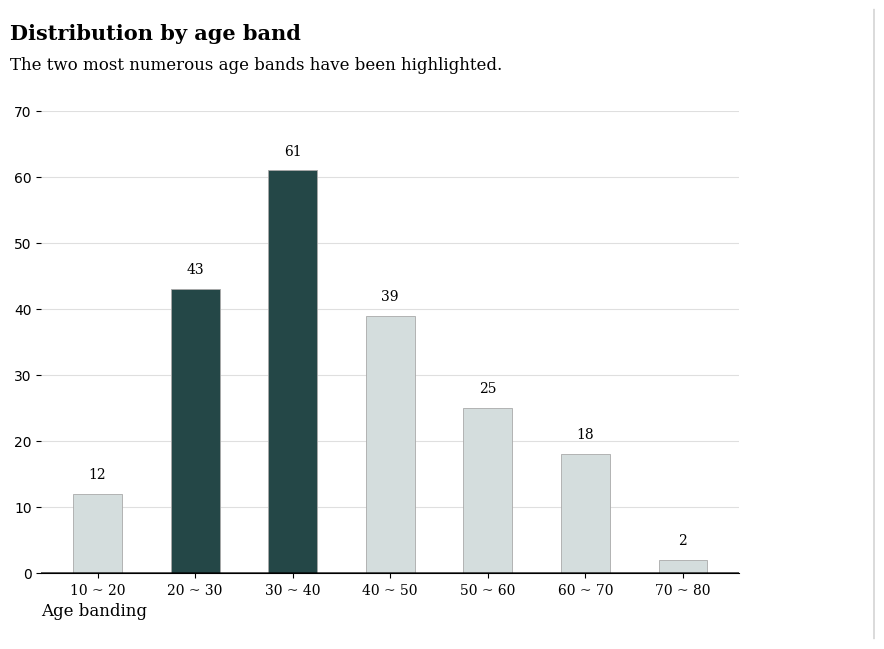

In [ ]:
# @title
# Order for plotting categorical vars
ab_order = ['10 ~ 20', '20 ~ 30', '30 ~ 40','40 ~ 50','50 ~ 60' ,'60 ~ 70', '70 ~ 80']

data = df['age_band'].value_counts()[ab_order]

color_map = ['#d4dddd' for _ in range(9)]
color_map[2] = color_map[1] = '#244747'

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.bar(data.index, data, width=0.5,
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


#annotations
for i in data.index:
    ax.annotate(f"{data[i]}",
                   xy=(i, data[i] + 3), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)



ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Distribution by age band', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The two most numerous age bands have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')



ax.grid(axis='y', linestyle='-', alpha=0.4)

grid_y_ticks = np.arange(0, 75, 10) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

plt.xlabel("Age banding", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)


# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

import matplotlib.lines as lines
l1 = lines.Line2D([1.05, 1.05], [0, 1.05], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


plt.show()



> Les deux tranches d’âge les plus fréquentes sont **20-30 ans et 30-40 ans**.
Dès les premières étapes de notre analyse exploratoire, nous pouvons déjà commencer à réfléchir à qui sont nos clients les plus importants et, surtout, à la manière dont nous pourrions adapter nos actions marketing ou nos offres promotionnelles en fonction des segments de clients.



## Discretization

- Discrétisation par tranches de revenu : nous avons regroupé les clients selon leur revenu annuel en cinq tranches (0–30k$, 30k–60k$, 60k–90k$, 90k–120k$, 120k–150k$) pour visualiser leur répartition et identifier les tranches les plus représentées.fin de visualiser la répartition des clients selon les groupes d’âge.





*   Discrétiser le Revenu annuel




#### Répartition des **clients** par **revenu annuel**

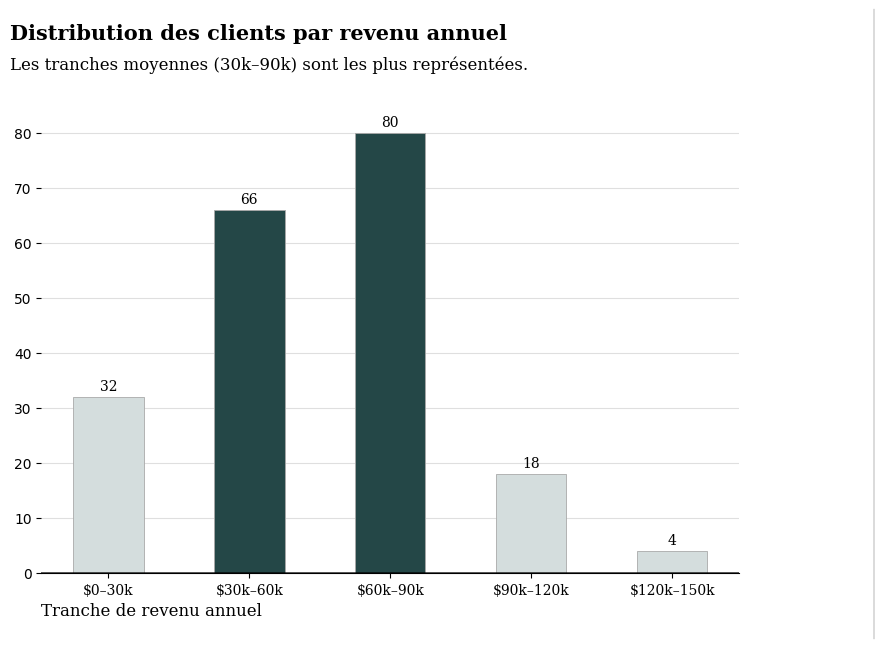

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Découpage des revenus ---
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31)&(df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61)&(df['Annual Income (k$)'] <= 90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)']>= 91)&(df['Annual Income (k$)']<=120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]

# --- Données pour le graphique ---
x_ai = ['$0–30k', '$30k–60k', '$60k–90k', '$90k–120k', '$120k–150k']
y_ai = [len(ai_0_30), len(ai_31_60), len(ai_61_90), len(ai_91_120), len(ai_121_150)]

# --- Palette et mise en avant ---
color_map = ['#d4dddd' for _ in range(len(x_ai))]
# Mettons par exemple en avant les tranches moyennes
color_map[2] = color_map[1] = '#244747'

# --- Création du graphique ---
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)

ax.bar(x_ai, y_ai, width=0.5, color=color_map,
       edgecolor='darkgray', linewidth=0.6)

# --- Annotations au-dessus des barres ---
for i, val in enumerate(y_ai):
    ax.annotate(f"{val}",
                xy=(x_ai[i], val + 2),  # légère marge
                va='center', ha='center',
                fontweight='light', fontfamily='serif')

# --- Style du graphique ---
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(axis='y', linestyle='-', alpha=0.4)
ax.set_axisbelow(True)

ax.set_xticklabels(x_ai, fontfamily='serif', rotation=0)
ax.set_yticks(np.arange(0, max(y_ai) + 10, 10))

plt.xlabel("Tranche de revenu annuel", fontsize=12,
           fontweight='light', fontfamily='serif', loc='left')

plt.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

# --- Titre et sous-titre ---
fig.text(0.09, 1.0, 'Distribution des clients par revenu annuel',
         fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Les tranches moyennes (30k–90k) sont les plus représentées.',
         fontsize=12, fontweight='light', fontfamily='serif')

# --- Ligne décorative à droite (optionnelle) ---
import matplotlib.lines as lines
l1 = lines.Line2D([1.05, 1.05], [0, 1.05],
                  transform=fig.transFigure, figure=fig,
                  color='black', lw=0.2)
fig.lines.extend([l1])

plt.show()




*   La plupart des revenus annuels des clients se situent entre **60 000 et 90 000**.



## Discretization

- Ce code discrétise le Spending Score en trois catégories (faible, moyen, fort) pour segmenter les comportements d’achat des clients et visualise leur distribution avec un graphique en barres, mettant en évidence la catégorie moyenne.





*   Discrétiser le Score de dépense




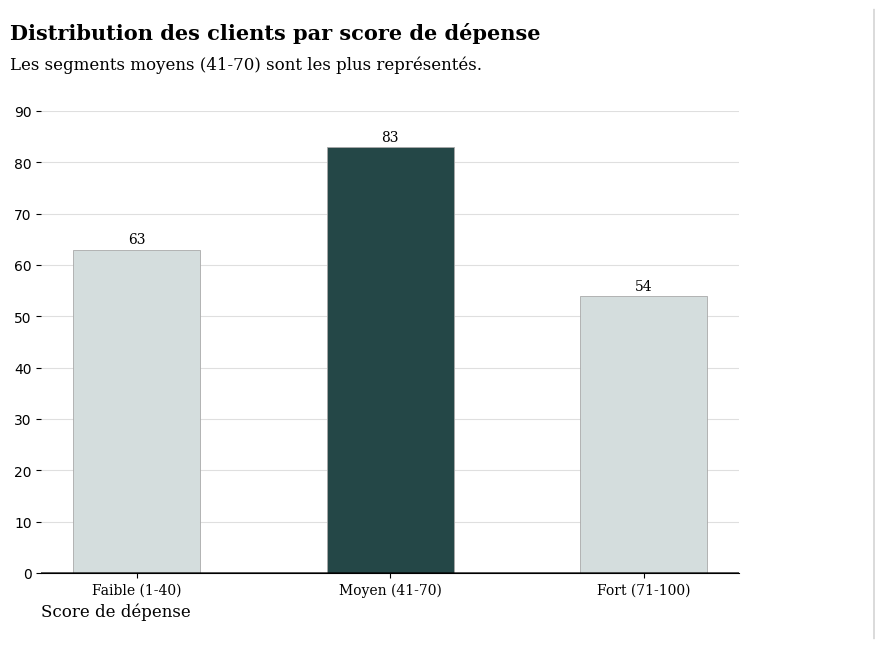

In [6]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Discrétisation du Spending Score ---
ss_faible = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 40)]
ss_moyen  = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 70)]
ss_fort   = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 71) & (df['Spending Score (1-100)'] <= 100)]

# --- Données pour le graphique ---
x_ss = ['Faible (1-40)', 'Moyen (41-70)', 'Fort (71-100)']
y_ss = [len(ss_faible), len(ss_moyen), len(ss_fort)]

# --- Palette et mise en avant ---
color_map = ['#d4dddd' for _ in range(len(x_ss))]
# On met en avant les segments moyens
color_map[1] = '#244747'

# --- Création du graphique ---
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)

ax.bar(x_ss, y_ss, width=0.5, color=color_map,
       edgecolor='darkgray', linewidth=0.6)

# --- Annotations au-dessus des barres ---
for i, val in enumerate(y_ss):
    ax.annotate(f"{val}",
                xy=(x_ss[i], val + 2),
                va='center', ha='center',
                fontweight='light', fontfamily='serif')

# --- Style du graphique ---
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(axis='y', linestyle='-', alpha=0.4)
ax.set_axisbelow(True)

ax.set_xticklabels(x_ss, fontfamily='serif', rotation=0)
ax.set_yticks(np.arange(0, max(y_ss) + 10, 10))

plt.xlabel("Score de dépense", fontsize=12,
           fontweight='light', fontfamily='serif', loc='left')

plt.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

# --- Titre et sous-titre ---
fig.text(0.09, 1.0, 'Distribution des clients par score de dépense',
         fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Les segments moyens (41-70) sont les plus représentés.',
         fontsize=12, fontweight='light', fontfamily='serif')

# --- Ligne décorative à droite (optionnelle) ---
import matplotlib.lines as lines
l1 = lines.Line2D([1.05, 1.05], [0, 1.05],
                  transform=fig.transFigure, figure=fig,
                  color='black', lw=0.2)
fig.lines.extend([l1])

plt.show()


# Outlier Detection and Treatment

#### **Numerical Features vs Categorical Features**



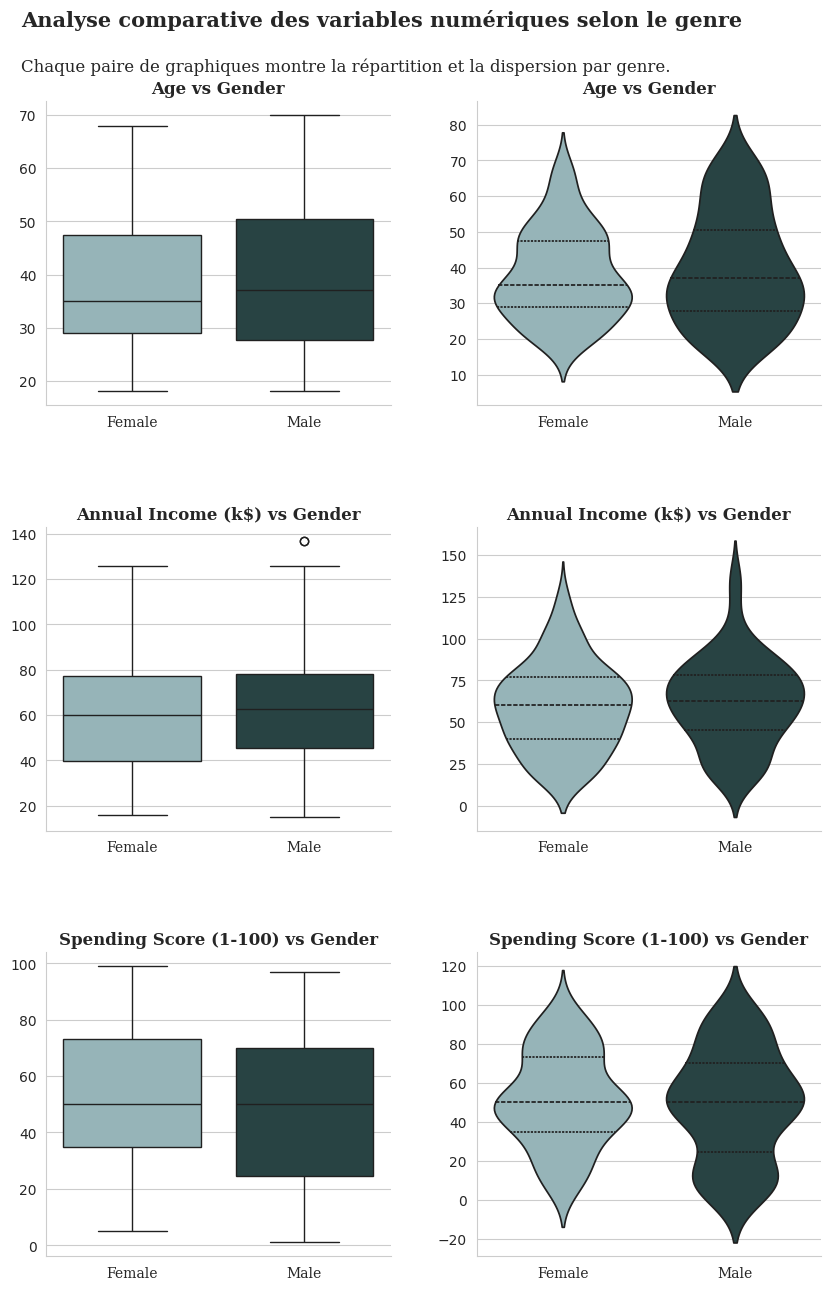

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple : si tes couleurs et variables sont définies ainsi
colors = ['#91b8bd', '#244747']   # Female / Male
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# --- Style global cohérent ---
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.25)

for i, feature in enumerate(numerical_features):
    # --- Boxplot (colonne 1) ---
    ax_box = axes[i, 0]
    sns.boxplot(x='Gender', y=feature, palette=colors, data=df1, ax=ax_box)
    ax_box.set_xticklabels(['Female', 'Male'], fontfamily='serif')
    ax_box.set_title(f'{feature} vs Gender', fontsize=12, fontweight='bold', fontfamily='serif')

    # Nettoyage visuel
    for s in ['top', 'right']:
        ax_box.spines[s].set_visible(False)
    ax_box.set_xlabel('')
    ax_box.set_ylabel('')

    # --- Violin plot (colonne 2) ---
    ax_violin = axes[i, 1]
    sns.violinplot(x='Gender', y=feature, palette=colors, data=df1, ax=ax_violin, inner='quartile')
    ax_violin.set_xticklabels(['Female', 'Male'], fontfamily='serif')
    ax_violin.set_title(f'{feature} vs Gender', fontsize=12, fontweight='bold', fontfamily='serif')

    for s in ['top', 'right']:
        ax_violin.spines[s].set_visible(False)
    ax_violin.set_xlabel('')
    ax_violin.set_ylabel('')

# --- Titre général ---
fig.text(0.1, 0.93, 'Analyse comparative des variables numériques selon le genre',
         fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.1, 0.90, 'Chaque paire de graphiques montre la répartition et la dispersion par genre.',
         fontsize=12, fontweight='light', fontfamily='serif')

plt.show()




> **Aucune** valeur **aberrante** n’a été détectée dans le dataset.












> Dédutions principales :



- La tranche d’âge des clientes se situe entre 30 et un peu moins de 50 ans, tandis que celle des clients masculins va de juste en dessous de 30 à 50 ans.  
- Pour les deux sexes, on observe un pic autour de 30-35 ans. L’âge médian des hommes est légèrement supérieur à celui des femmes.  

- Pour le revenu annuel (en k\$), le revenu des clientes commence à partir de 40k, tandis que celui des clients masculins est supérieur à cette valeur.  
- Le revenu annuel médian (en k\$) pour les deux sexes est d’environ 60k. Le revenu annuel (en k\$) des clients masculins diminue très rapidement après le pic, avec quelques valeurs extrêmes, comparé aux clientes.  

- Le score de dépense médian (1-100) est le même pour les deux sexes, malgré des points de départ différents : un peu moins de 40 pour les clientes et un peu plus de 20 pour les clients masculins.  
- Les deux sexes présentent un pic marqué à la valeur médiane, surtout pour les clientes. Cependant, les clients masculins présentent également un petit pic significatif dans la plage 0-20.


### **Segmentation exploratoire des clients**




> Identification de groupes naturels dans les données (clustering) lors de l’exploration des données



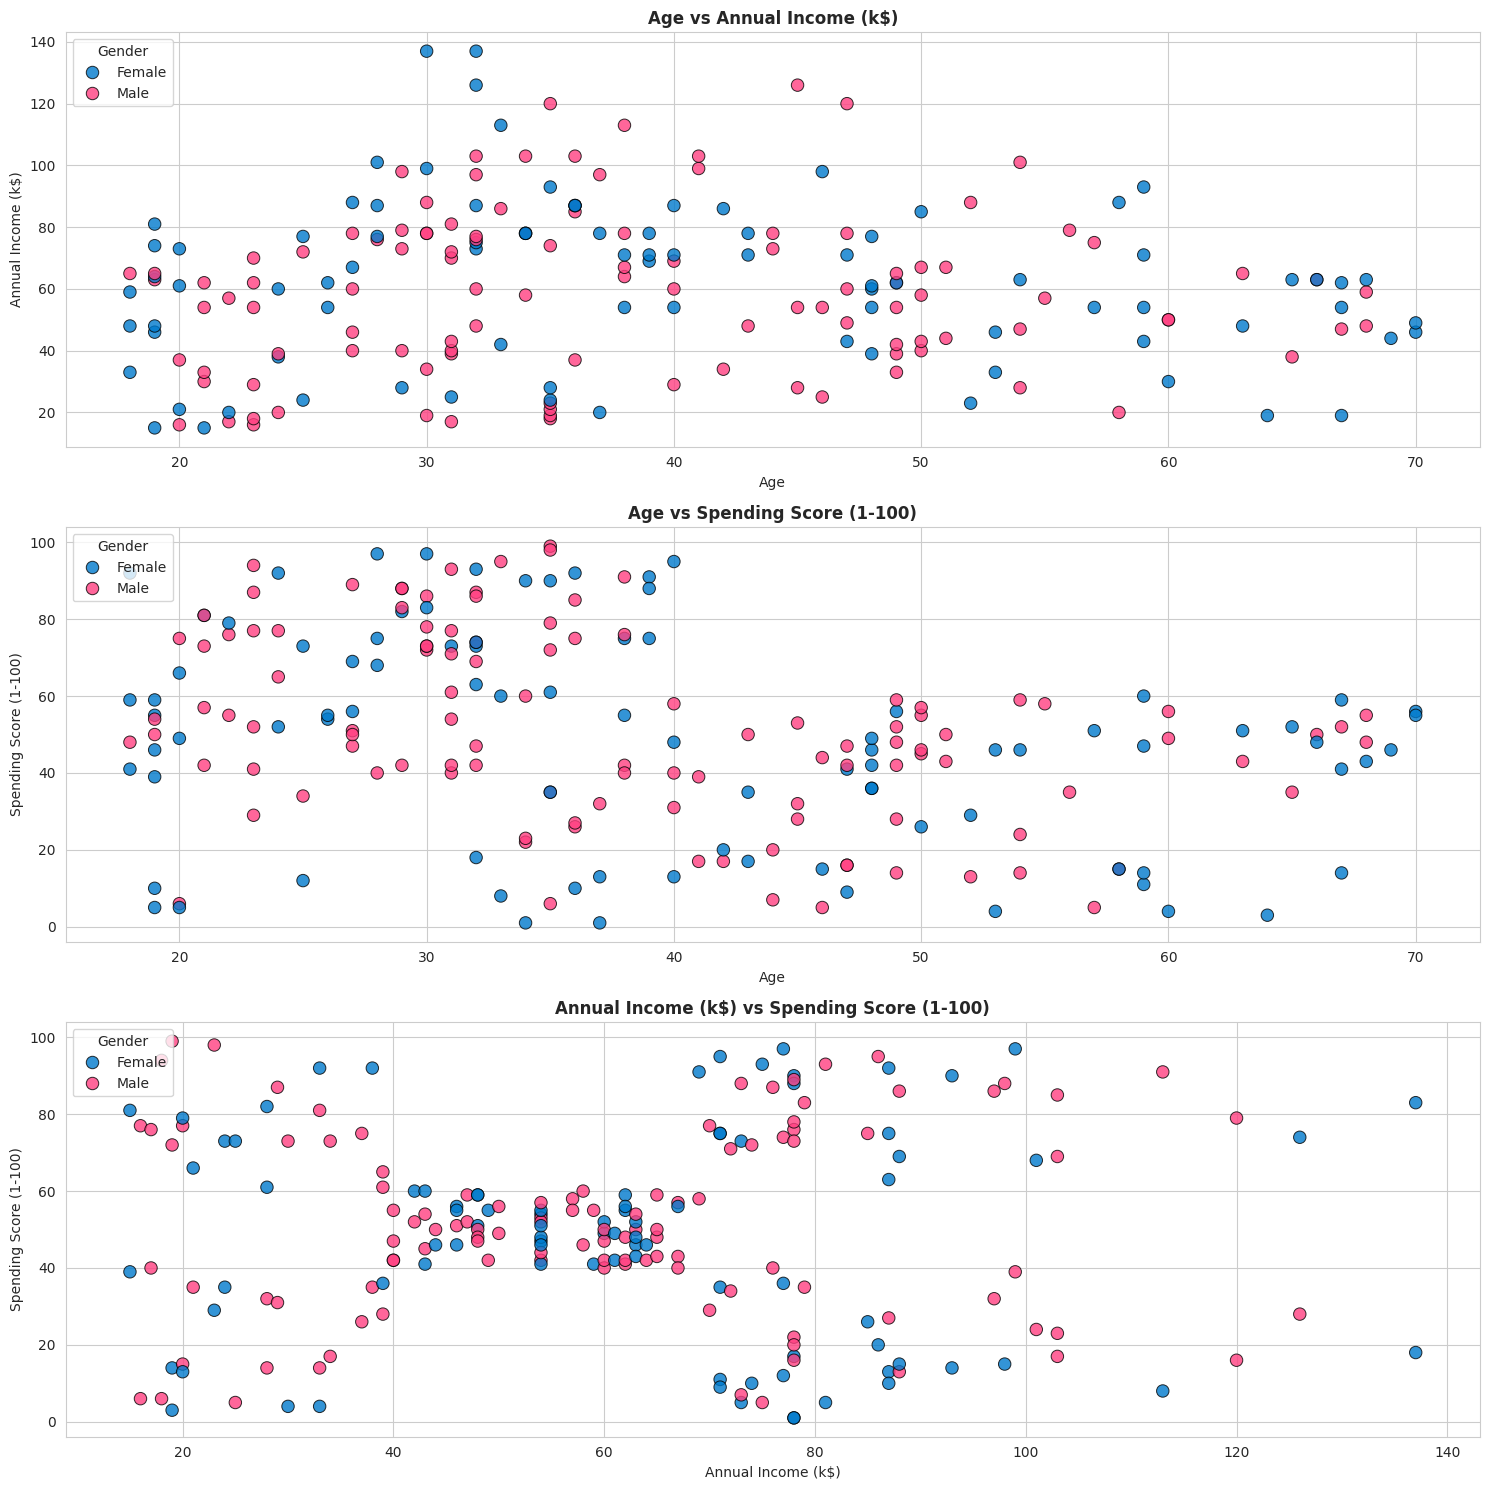

In [ ]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Palette plus contrastée : bleu et rose vif
colors = ['#007acc', '#ff4081']  # bleu & rose bien distincts
sns.set_style("whitegrid")

# Créer une copie temporaire du DataFrame avec les labels textuels
df_plot = df1.copy()
df_plot['Gender'] = df_plot['Gender'].map({0: 'Male', 1: 'Female'})

a = 0
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

for i in range(len(numerical_features) - 1):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3, 1, a)
            sns.scatterplot(
                x=numerical_features[i],
                y=numerical_features[j],
                data=df_plot,  # on utilise df_plot ici
                hue='Gender',
                palette=colors,
                edgecolor='black',
                s=80,
                alpha=0.8
            )
            plt.legend(title='Gender', loc='upper left', frameon=True)
            title = f"{numerical_features[i]} vs {numerical_features[j]}"
            plt.title(title, fontsize=12, fontweight='bold')
            plt.xlabel(numerical_features[i], fontsize=10)
            plt.ylabel(numerical_features[j], fontsize=10)

plt.tight_layout()
plt.show()


- Les données de revenu annuel (en k$) sont présentes pour toutes les valeurs d’âge, le genre ne fournit donc pas d’information significative.  

- Pour le score de dépense (1-100), on observe clairement que la tranche d’âge 20-30 présente des habitudes de dépense très élevées.  
- La tranche d’âge 30-40 montre les deux extrêmes des habitudes de dépense chez les clients.  
- Les clients âgés de 40 à 70 ans présentent l’autre extrême, avec des valeurs de dépense faibles.  

- À partir du graphique Revenu Annuel (k\$) vs Score de Dépense (1-100), on peut identifier clairement 5 groupes distincts :  
  - Pour les revenus annuels entre 0 et 40 k\$, deux groupes de clients se distinguent selon le score de dépense : 0-40 et 60-100.  
  - Ensuite, le groupe central de clients a un revenu annuel entre 40 et 70 k\$ et un score de dépense entre 40 et 60.  
  - Pour les revenus annuels entre 70 et 140 k\$, on retrouve l’autre extrême, divisé en deux groupes selon le score de dépense : 0-40 et 60-100.


# Summary of EDA


- Pour les données du centre commercial, le nombre de clientes est supérieur à celui des clients masculins. Les données de genre sont globalement réparties de manière équilibrée par rapport aux autres caractéristiques.  

- Les clients du centre commercial peuvent être divisés selon leurs tranches d’âge :  
  - 20-30  
  - 30-40  
  - 40-70  

- Le revenu annuel médian (en k$) pour les deux sexes est d’environ 60k. On peut distinguer trois groupes de valeurs :  
  - 0-40k  
  - 40-70k  
  - 70-140k  

- Le score de dépense (1-100) des clientes est plus élevé que celui des clients masculins. Il permet également de diviser les clients en trois groupes :  
  - 0-40  
  - 40-60  
  - 60-100  

- En utilisant la combinaison de ces valeurs, les clients du centre commercial peuvent être segmentés, permettant ainsi de mieux cibler leurs besoins et préférences.


# **Prétraitement**

### Encodage des variables catégorielles

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Gender'] = le.fit_transform(df1['Gender'])

print('Label Encoder Transformation')
print(df1['Gender'].unique(),' = ',le.inverse_transform(df1['Gender'].unique()))

Label Encoder Transformation
[1 0]  =  ['Male' 'Female']




- Je crée une **copie profonde** du dataset original et je fais un **label encoding** sur la colonne **Gender** pour transformer le tex


te en valeurs numériques.  
- Les modifications dans le dataset original **n’apparaîtront pas** dans cette copie.  
- Du coup, j’utilise cette copie avec **Gender converti en numérique** .


# **Feature Engineering**


### Correlation Matrix

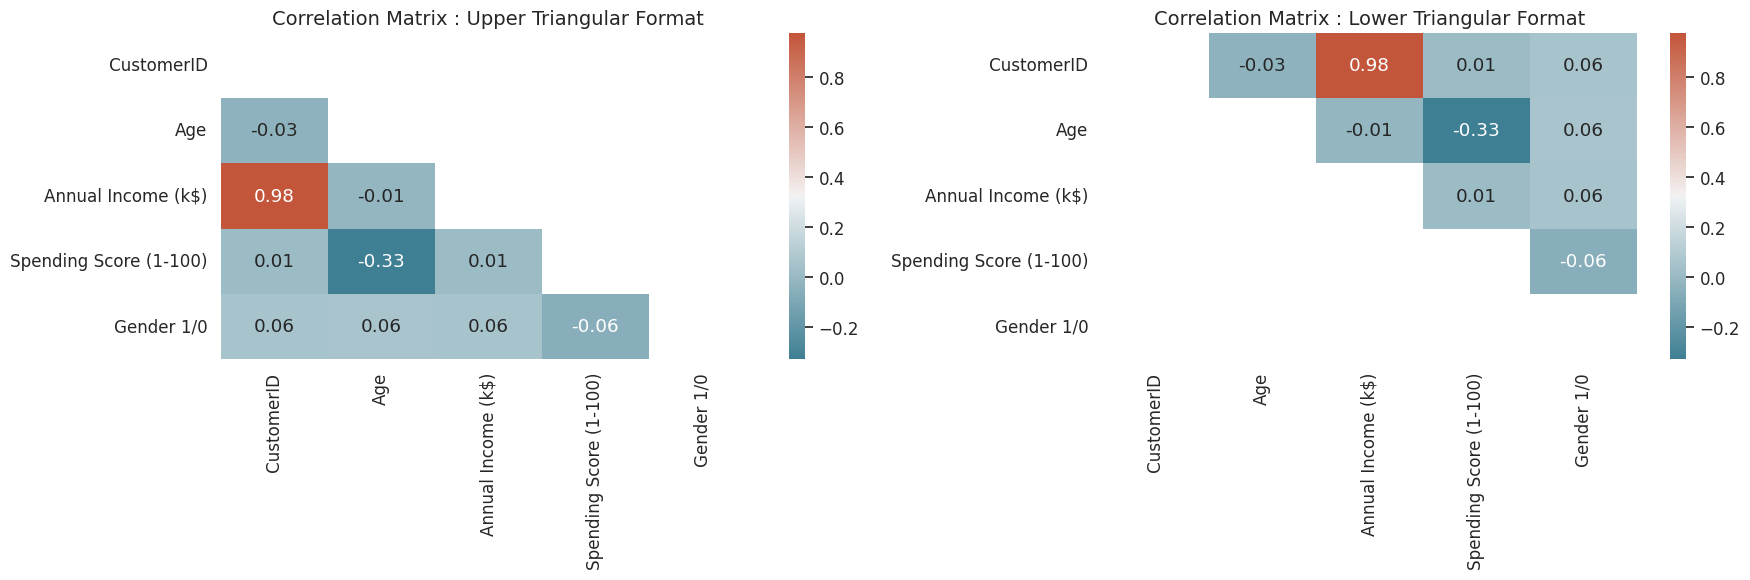

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style et thème modernes
sns.set_theme(style="white", font_scale=1.1)
df_final = df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender 1/0']].copy()
# Calcul de la matrice de corrélation
corr = df_final.corr()

# Masques pour les parties triangulaires
mask_upper = np.triu(np.ones_like(corr, dtype=bool))
mask_lower = np.tril(np.ones_like(corr, dtype=bool))

# Palette esthétique bleu ↔ rouge
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Figure avec deux sous-graphes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

# Matrice triangulaire supérieure
sns.heatmap(corr, mask=mask_upper, cmap=cmap, annot=True, fmt=".2f", cbar=True, ax=ax[0])
ax[0].set_title('Correlation Matrix : Upper Triangular Format', fontsize=14)

# Matrice triangulaire inférieure
sns.heatmap(corr, mask=mask_lower, cmap=cmap, annot=True, fmt=".2f", cbar=True, ax=ax[1])
ax[1].set_title('Correlation Matrix : Lower Triangular Format', fontsize=14)

plt.tight_layout()
plt.show()



- La variable **CustomerID** présente une très forte corrélation positive avec le **revenu annuel (k$)**, car les clients sont classés par ordre croissant de revenu annuel.  
  Nous n’allons donc **pas inclure CustomerID** pour la modélisation.  

- La variable **Genre** ne montre aucune relation significative avec les autres variables.  
  Elle reste globalement neutre, avec des valeurs proches de 0.  

- Le **Score de dépense (1-100)** et **l’âge** présentent une **corrélation négative** :  
  lorsque la valeur de l’un augmente, celle de l’autre diminue, et inversement.  




#### **Voyons maintenant comment nos variables numériques sont liées entre elles**

Les graphiques statistiques peuvent nous aider à repérer les relations entre les variables de notre jeu de données.  

Dans ce cas, nous pouvons même observer **des clusters potentiels**…


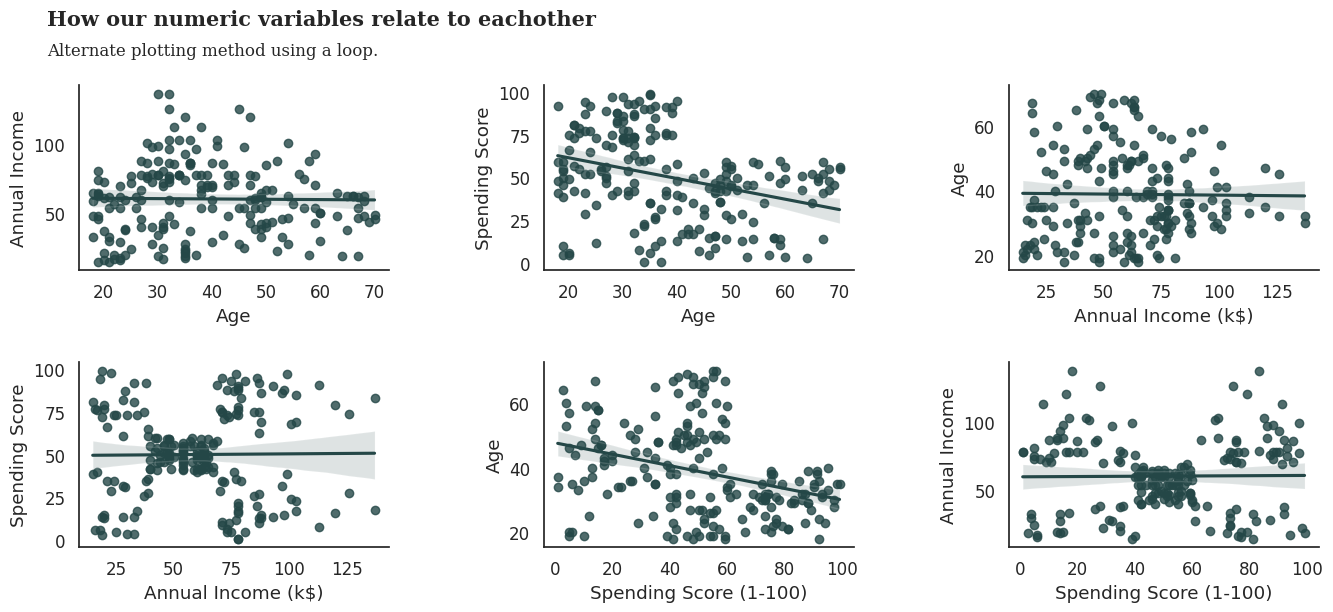

In [ ]:
# @title
fig = plt.figure(figsize=(16, 6))
# Title and sub-title
fig.text(0.105, .98, 'How our numeric variables relate to eachother', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, 'Alternate plotting method using a loop.', fontsize=12, fontweight='light', fontfamily='serif')

n = 0

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        if x==y: continue

        n += 1
        plt.subplot(2 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df,color='#244747')
        sns.despine()
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None) # useful for adjusting space between subplot

plt.show()


#### **Zoom sur un graphique intéressant**


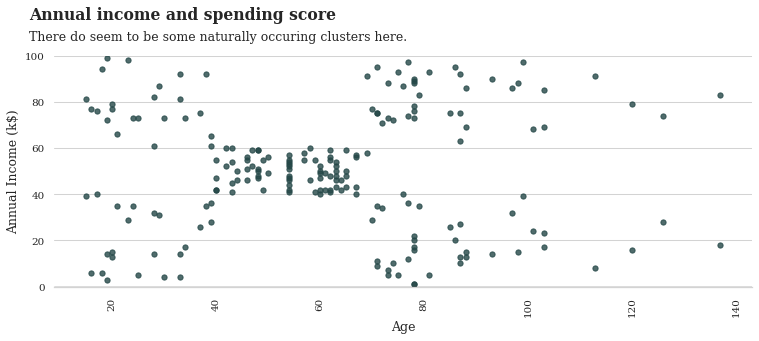

In [ ]:
# @title
fig, ax = plt.subplots(figsize=(12, 4), dpi=75)

# Title & Subtitle
fig.text(0.097,1,'Annual income and spending score', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.097,0.93,'There do seem to be some naturally occuring clusters here.',fontfamily='serif',fontsize=12)

# Ax spines
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.spines['bottom'].set_color('lightgray')

# Grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgray', linestyle='-')

# Plot

plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = df ,color='#244747',s = 25 , alpha = 0.8 )


# Tick control
plt.yticks(fontsize=10, fontfamily='serif',fontweight='light')
#ax.yaxis.set_ticks(np.arange(0,140,10))

plt.xticks(fontsize=10, fontfamily='serif',fontweight='light',rotation=90)

# Label control
ax.set_ylabel('Annual Income (k$)',fontfamily='serif',fontsize=12)
ax.set_xlabel('Age',fontfamily='serif',fontsize=12)

ax.set_ylim(0, 100)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.show()


> Il semble qu’il y ait ici quelques **clusters** qui se **forment naturellement**.




# **Data Scaling**


Un modèle d’apprentissage automatique ne comprend pas les unités des valeurs des variables (*features*). Il considère chaque valeur simplement comme un nombre, sans en saisir la signification réelle. Il devient donc nécessaire de **mettre les données à l’échelle**.

Nous avons deux options pour la mise à l’échelle des données :

1. **Normalisation**  
2. **Standardisation**

Comme la plupart des algorithmes supposent que les données suivent une distribution normale (Gaussienne) :

- La **normalisation** est utilisée pour les variables qui ne présentent pas de distribution normale.
- La **standardisation** est utilisée pour les variables qui suivent une distribution normale mais dont l’échelle est très grande ou très petite par rapport aux autres variables.








> Dans la partie EDA, nous remarquons que les données suivent une distribution normale (Gaussienne). Nous procédons donc avec la **standardisation**.  



Pour le jeu de données étudié, nous avons appliqué la standardisation aux variables suivantes :


*  Age
* Revenu annuel (k$)

*   Score de dépense (1-100)

*   Élément de liste
*   La variable *Genre* n’a pas été modifiée.





In [ ]:
from sklearn.preprocessing import StandardScaler

selected_cols = ["Spending Score (1-100)", "Annual Income (k$)", "Age"]
cluster_data = df.loc[:,selected_cols]
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

### **Échantillonnage (Sampling)**

##### Échantillonnage aléatoire simple

In [ ]:
import pandas as pd

# Exemple : prendre 3% des données aléatoirement
sample_df = df_final.sample(frac=0.03, random_state=42)
print(sample_df.shape)
display(sample_df)



(6, 5)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender 1/0
95,96,24,60,52,1
15,16,22,20,79,1
30,31,60,30,4,1
158,159,34,78,1,1
128,129,59,71,11,1
115,116,19,65,50,0


- Utilisé pour créer des sous-ensembles de test ou d’exploration rapide.

#### Avec remplacement (bootstrap)

In [ ]:
df_final.sample(frac=0.03, replace=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
52,53,31,43,54,0
73,74,60,50,56,0
132,133,25,72,34,0
4,5,31,17,40,0
112,113,38,64,42,0
188,189,41,103,17,0


# **Clustering**

#### **Elbow Method** pour la sélection du nombre de cluster optimal

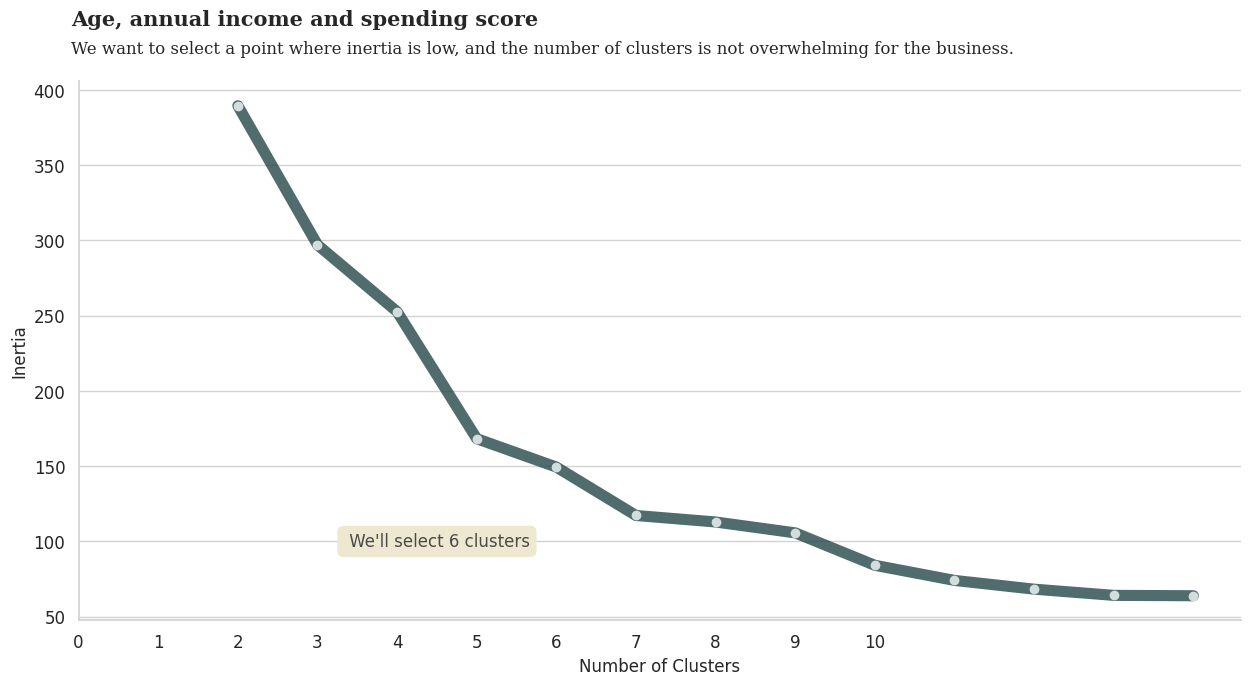

In [ ]:
# @title
fig, ax = plt.subplots(figsize=(15,7))

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(clusters_range,inertias, '-' , color='#244747',alpha = 0.8,linewidth=8)
plt.plot(clusters_range,inertias, 'o',linewidth=20,color='#d4dddd')

##
plt.xlabel('Number of Clusters',fontsize=12) , plt.ylabel('Inertia',fontsize=12)
ax.xaxis.set_ticks(np.arange(0,11,1))

# Title & Subtitle
fig.text(0.12,0.96,'Age, annual income and spending score', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.12,0.92,'We want to select a point where inertia is low, and the number of clusters is not overwhelming for the business.',fontfamily='serif',fontsize=12)


ax.annotate(" We'll select 6 clusters",
            xy=(4.5, 100), fontsize=12,
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

# Ax spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

for s in ['left', 'bottom']:
    ax.spines[s].set_color('lightgray')

# Grid
ax.set_axisbelow(True)# Ax spines

ax.yaxis.grid(color='lightgray', linestyle='-')
plt.show()

- On cherche le point où la diminution de l’inertie commence à ralentir → c’est le “coude”.

- Ce point indique un bon compromis entre qualité des clusters et nombre raisonnable de clusters pour le business.

### Analyse de la **stabilité** des clusters avec *Silhouette Score*

Ce code a pour objectif de structurer et organiser les résultats de multiples exécutions de K-Means afin d’évaluer la stabilité et la qualité du clustering pour différents nombres de clusters et différentes graines aléatoires (random seed).

In [ ]:
# @title
from sklearn.metrics import silhouette_samples, silhouette_score

# Running various cluster numbers with various random seeds
clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For N_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

In [ ]:
# @title
# Turn results in to a pivot table
result = pd.DataFrame(results, columns=["Number of clusters","Random seed","Silhouette_score"])
pivot_km = pd.pivot_table(result, index="Number of clusters", columns="Random seed",values="Silhouette_score")

#### **Concepts du score de silhouette :**

* Le **score de silhouette** pour un ensemble de points de données est utilisé pour mesurer à quel point les clusters sont denses et bien séparés.  
* Le score de silhouette prend en compte :  
  - la **distance intra-cluster** entre un point et les autres points du même cluster (a)  
  - la **distance inter-cluster** entre ce point et le cluster le plus proche (b).  
* Le score de silhouette varie dans l’intervalle [-1, 1].  
* Un score de **1** signifie que les clusters sont très denses et bien séparés.  
* Un score de **0** signifie que les clusters se chevauchent.  
* Un score **inférieur à 0** indique que certains points peuvent être mal assignés à un cluster.  
* Les **graphiques de silhouette** peuvent être utilisés pour sélectionner la valeur optimale de **K** (nombre de clusters) dans un clustering K-means.  
* Les éléments à surveiller dans les graphiques de silhouette sont :  
  - les clusters dont le score est inférieur à la moyenne,  
  - de larges variations de taille entre les clusters,  
  - et l’épaisseur du tracé de silhouette.


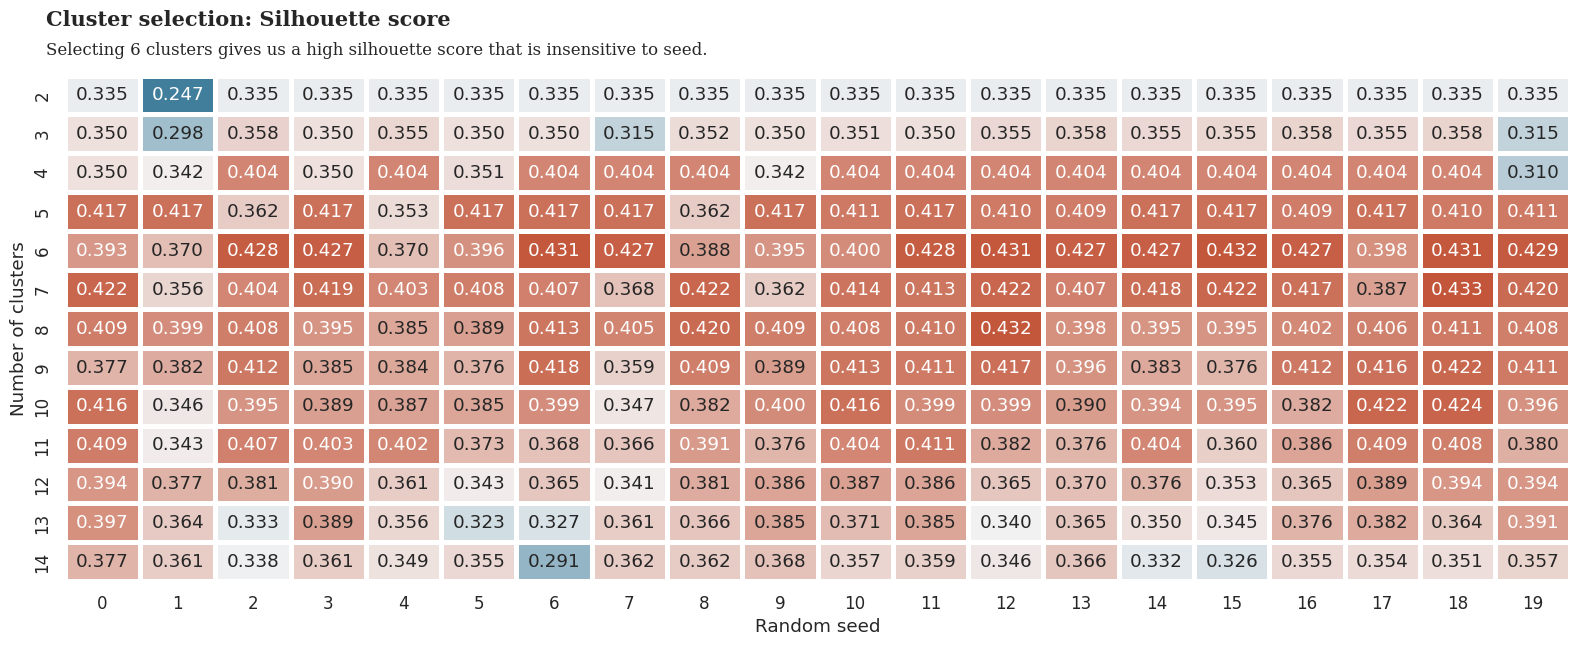

In [ ]:
# @title
# Turn that pivot in to a nice visual
fig = plt.figure(figsize=(16, 6))

# Title and sub-title

fig.text(0.035, 1.05, 'Cluster selection: Silhouette score', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.035, 1.001, 'Selecting 6 clusters gives us a high silhouette score that is insensitive to seed.', fontsize=12, fontweight='light', fontfamily='serif')

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(pivot_km, annot=True, linewidths=2.5, fmt='.3f', cmap=cmap,cbar=False)

plt.tight_layout()

In [ ]:
# @title
# Six looks to be a good number of clusters. We will also assign these clusters to a df
kmeans_sel = KMeans(n_clusters=6, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

For n_clusters = 6  and seed = 19 
The average silhouette_score is : 0.3704777157273326


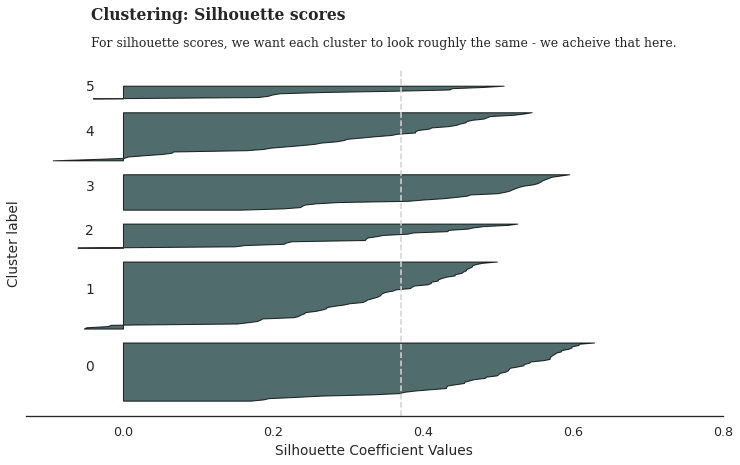

In [ ]:
# @title
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=6, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 6," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax = plt.subplots(figsize=(12,6), dpi=75)

y_lower = 10
for i in range(6):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 6)
    ax.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor='#244747', edgecolor="black",linewidth=1, alpha=0.8)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples


fig.text(0.198, .99, 'Clustering: Silhouette scores', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.198,.93, 'For silhouette scores, we want each cluster to look roughly the same - we acheive that here.', fontsize=12, fontweight='light', fontfamily='serif')

ax.get_yaxis().set_ticks([])
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="lightgray", linestyle="--")
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

plt.show()



> ####  Interprétation du graphique Silhouette



- Tous les clusters ont une **forme assez régulière** (même épaisseur) → bonne homogénéité.  
- La majorité des points ont un **score compris entre 0.3 et 0.7**, donc le **clustering est globalement bon**.  
- Il n’y a **pas de fortes zones négatives**, ce qui indique **peu de points mal classés**.  
- Les clusters présentent des **tailles relativement équilibrées**.

 **Conclusion :**  
Le modèle de clustering (avec **6 clusters**) est **globalement cohérent et bien séparé**.


### **Analyse descriptive des clusters**

In [ ]:
clustered_data.head()

,Spending Score (1-100),Annual Income (k$),Age,Cluster
0,39,15,19,1
1,81,15,21,1
2,6,16,20,2
3,77,16,23,1
4,40,17,31,1


In [ ]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Spending Score (1-100),Annual Income (k$),Age
0,0,48.9,54.4,55.6
1,1,62.2,41.1,25.2
2,2,18.4,26.8,46.2
3,3,81.1,77.7,33.0
4,4,19.4,86.1,39.9
5,5,82.7,108.2,32.5


### **Conceptually showing clusters**

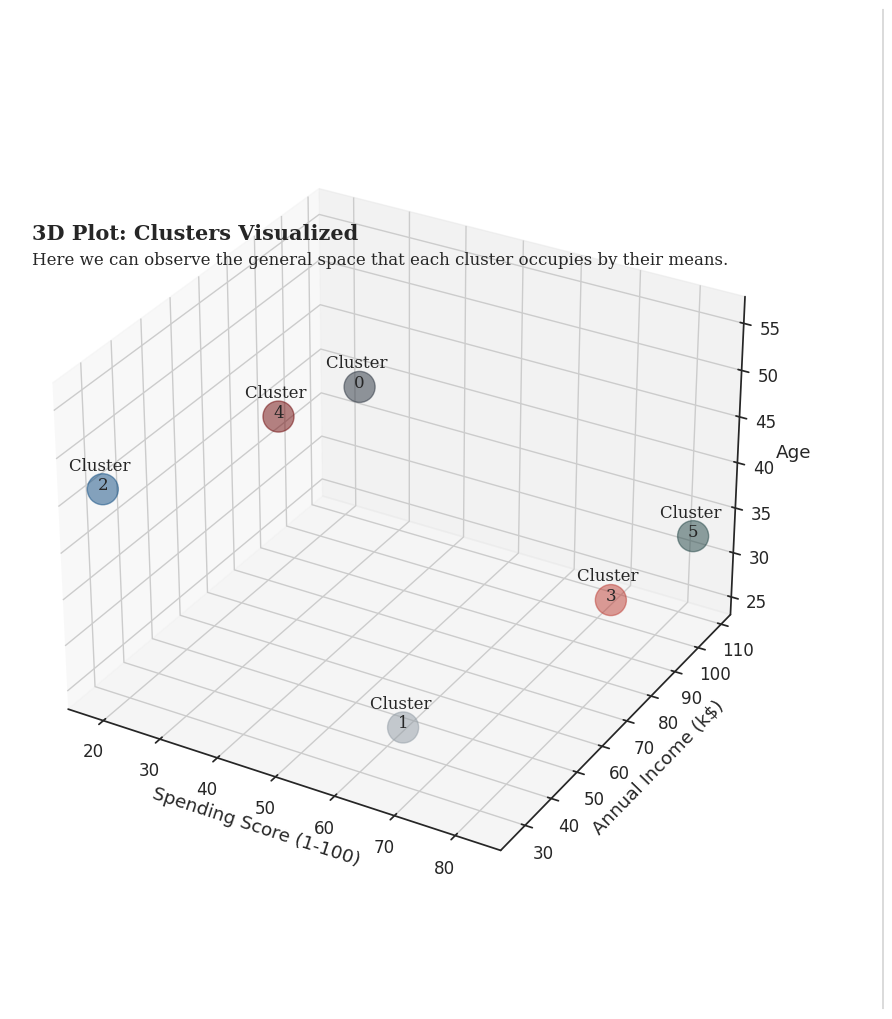

In [ ]:
# @title
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grouped_km2["Spending Score (1-100)"], grouped_km2["Annual Income (k$)"], grouped_km2["Age"],color=['#2a333f','#939da6','#0f4c81','#be3e35','#70090a','#244747'],alpha=0.5,s=500)

# add annotations one by one with a loop
for line in range(0,grouped_km.shape[0]):
     ax.text(grouped_km2['Spending Score (1-100)'][line], grouped_km2['Annual Income (k$)'][line],grouped_km2['Age'][line], s=('Cluster \n'+grouped_km2['Cluster'][line]), horizontalalignment='center', fontsize=12, fontweight='light', fontfamily='serif')

ax.set_xlabel("Spending Score (1-100)")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Age")

fig.text(0.15, .77, '3D Plot: Clusters Visualized', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.15, .745, 'Here we can observe the general space that each cluster occupies by their means.', fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


Nous observons une **distinction claire entre les clusters**.  

As a business, il peut être utile de **renommer les clusters** afin qu’ils aient un sens clair et évident :  



- **Cluster 0** - Low spending score, low income, moderate age - **Least Valuable**

- **Cluster 1** - Low spending score, high income, moderate age - **Targets**

- **Cluster 2** - Moderate spending score, moderate income, young age - **Valuable**

- **Cluster 3** - Moderate spending score, moderate income, high age - **Less Valuable**

- **Cluster 4** - High spending score, high income, young age - **Most Valuable**

- **Cluster 5** - High spending score, low income, young age - *Very Valuable*.